In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#taking inputs of XOR gate as training data
X_train=np.array([[0,0],[0,1],[1,0],[1,1]])
# .T is to take transpose of the matrix
y_train=np.array([0,1,1,0]).T
y_train=y_train.reshape(4,1)

In [49]:
def func(t):
    return 1/(1+np.exp(-t))

def derivative(t):
    return t*(1-t)

In [50]:
def initialize(input_neurons=2,hidden_neurons=2,output_neurons=1):
    np.random.seed(0)
    weights_inh=np.random.random((input_neurons,hidden_neurons))
    weights_hio=np.random.random((hidden_neurons,output_neurons))
    return weights_inh,weights_hio
    
weights_ih,weights_ho=initialize(2,2,1)

In [51]:
#forward propagation
hidden_input=func(np.dot(X_train,weights_ih))
predicted_output=func(np.dot(hidden_input,weights_ho))

In [53]:
#error calculation
abs_error= np.subtract(y_train,predicted_output)
hidden_layer_error= derivative(predicted_output)*(abs_error)
d_hidden= np.dot(predicted_output,weights_ho.T)
input_layer_error= derivative(hidden_input)*d_hidden

In [54]:
#updating weights
lr=0.5
weights_ih += np.dot(X_train.T,input_layer_error)*lr
weights_ho += np.dot(hidden_input.T,hidden_layer_error)*lr

In [104]:
import numpy as np
import matplotlib.pyplot as plt

#taking inputs of XOR gate as training data
X_train=np.array([[0,0],[0,1],[1,0],[1,1]])
# .T is to take transpose of the matrix
y_train=np.array([0,1,1,0]).T
y_train=y_train.reshape(4,1)

def func(x):
    return np.tanh(x)

def derivative(x):
    return 1- x**2

def initialize(input_neurons=2,hidden_neurons=2,output_neurons=1):
    np.random.seed(0)
    weights_inh=np.random.random((input_neurons,hidden_neurons))
    bias_layer1 =np.random.random(size=(4,hidden_neurons))
    
    weights_hio=np.random.uniform((hidden_neurons,output_neurons))
    bias_layer2 = np.random.uniform(size=(4,output_neurons))
    
    return weights_inh,weights_hio,bias_layer1,bias_layer2
    

def train(lr=0.5,epochs=10000):
    #initialize
    weights_ih,weights_ho,hidden_bias,output_bias=initialize(2,2,1)
    for _ in range(epochs):

        #forward propagation
        hidden_input= np.dot(X_train,weights_ih)
        hidden_input+= hidden_bias
        hidden_input= func(hidden_input)
        predicted_output= np.dot(hidden_input,weights_ho)
        predicted_output+= output_bias
        predicted_output= func(predicted_output)
        
        #error calculation
        error= y_train-predicted_output
        hidden_layer_error= derivative(predicted_output) * error
        
        d_hidden= np.dot(hidden_layer_error,weights_ho.T)
        input_layer_error= derivative(hidden_input) * d_hidden
        
        #updating weights
        weights_ih += np.dot(X_train.T,input_layer_error) * lr
        weights_ho += np.dot(hidden_input.T,hidden_layer_error) * lr
        output_bias += np.sum(hidden_layer_error,axis=0,keepdims=True) * lr
        hidden_bias += np.sum(input_layer_error,axis=0,keepdims=True) * lr
        
        
    print("Final hidden weights: ",end='')
    print(*weights_ih)
    print("Final hidden bias: ",end='')
    print(*hidden_bias)
    print("Final output weights: ",end='')
    print(*weights_ho)
    print("Final output bias: ",end='')
    print(*output_bias)

    print("\nOutput from neural network after 10,000 epochs: ",end='')
    print(*predicted_output)
        
    return hidden_layer_error,input_layer_error,hidden_bias,output_bias,weights_ih,weights_ho

x1=int(input("Entry 1: "))
x2=int(input("Entry 2: "))
X_test=np.array([[x1,x2]])

if x1 in range(2) and x2 in range(2):
    penalty_layer1,penalty_layer2,bias1,bias2,weights_layer1,weights_layer2=train()
    hidden_input=func(np.dot(X_test,weights_layer1)+ bias1)
    predicted_output=func(np.dot(hidden_input,weights_layer2) + bias2)
    print(predicted_output)
    if predicted_output < 0.5:
        print("0")
    else:
        print("1")
else:
    print("ONLY 0 and 1 are allowed as entries!!!!")
    

Entry 1: 1
Entry 2: 1


ValueError: non-broadcastable output operand with shape (4,) doesn't match the broadcast shape (4,4)

In [76]:
y_train=np.array([0,1,1,0]).T
y_train=y_train.reshape(4,1)
print(y_train)

[[0]
 [1]
 [1]
 [0]]


[[0.01377877]
 [0.9881831 ]
 [0.98819065]
 [0.01217909]]


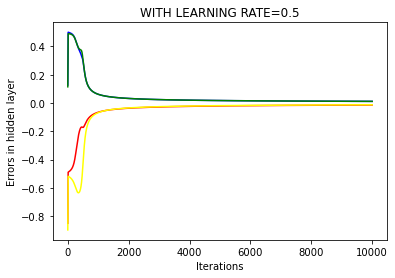

In [145]:
import numpy as np
import matplotlib.pyplot as plt

#taking inputs of XOR gate as training data
X_train=np.array([[0,0],[0,1],[1,0],[1,1]])
# .T is to take transpose of the matrix
y_train=np.array([0,1,1,0]).T
y_train=y_train.reshape(4,1)

turns=[]
errors_1=[]
errors_2=[]
errors_3=[]
errors_4=[]

def func(x):
    return 1/(1+np.exp(-x))

def derivative(t):
     return t*(1-t)

def train(lr=0.5,epochs=10000):
    #initialize
    inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1
    #Random weights and bias initialization
    hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
    hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
    output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
    output_bias = np.random.uniform(size=(1,outputLayerNeurons))

    for i in range(epochs):
        turns.append(i)
        #FORWARD PROPAGATION
        hidden_layer_activation = np.dot(X_train,hidden_weights)
        hidden_layer_activation += hidden_bias
        hidden_layer_output = func(hidden_layer_activation)

        output_layer_activation = np.dot(hidden_layer_output,output_weights)
        output_layer_activation += output_bias
        predicted_output = func(output_layer_activation)

        #Backpropagation
        error = y_train - predicted_output
        d_predicted_output = error *derivative(predicted_output)

        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * derivative(hidden_layer_output)
        
        errors_1.append(error[0])
        errors_2.append(error[1])
        errors_3.append(error[2])
        errors_4.append(error[3])


        #Updating Weights and Biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
        output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
        hidden_weights += X_train.T.dot(d_hidden_layer) * lr
        hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr
    print(predicted_output)   
    return hidden_weights, hidden_bias,output_weights,output_bias

train(0.9,10000)
plt.plot(turns,errors_1,color="RED")
plt.plot(turns,errors_2,color="BLUE")
plt.plot(turns,errors_3,color="GREEN")
plt.plot(turns,errors_4,color="YELLOW")

plt.xlabel("Iterations")
plt.ylabel("Errors in hidden layer")
plt.title("WITH LEARNING RATE=0.5")
plt.show()


